In [22]:
# Dependencies
import pandas as pd

In [23]:
# Store filepath in a variable
census_data = "chicago_census_data.csv"
vaccine_data = "COVID-19_Vaccinations_by_ZIP_Code.csv"

In [24]:
census_df = pd.read_csv(census_data, encoding="ISO-8859-1")
vaccine_df = pd.read_csv(vaccine_data,encoding="ISO-8859-1")

In [25]:
#cleaning census so Zip Code column matches Vaccinee CSV Zip Code
census_df = census_df.rename(columns={"Zipcode":"Zip Code"})
census_df.dtypes

Zip Code               int64
Population             int64
Median Age           float64
Household Income       int64
Per Capita Income      int64
Poverty Count          int64
Poverty Rate         float64
dtype: object

In [26]:
#getting rid of 'Unknown' values in vaccine df
vaccine_df = vaccine_df[vaccine_df["Zip Code"] != "Unknown"]
#changing Zip Code from Object to int
vaccine_df["Zip Code"]=vaccine_df["Zip Code"].astype(int)

In [27]:
#merging Data
merge_df = pd.merge(vaccine_df, census_df, on="Zip Code")
merge_df

,Zip Code,Date,Total Doses - Daily,Total Doses - Cumulative,1st Dose - Daily,1st Dose - Cumulative,1st Dose - Percent Population,Vaccine Series Completed - Daily,Vaccine Series Completed - Cumulative,Vaccine Series Completed - Percent Population,Population_x,ZIP Code Location,Row_ID,Population_y,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate
0,60603,12/15/2020,0,0,0,0,0.000,0,0,0.000,1052,POINT (-87.625473 41.880112),60603-20201215,1052,31.2,146250,134620,142,13.498099
1,60603,12/16/2020,0,0,0,0,0.000,0,0,0.000,1052,POINT (-87.625473 41.880112),60603-20201216,1052,31.2,146250,134620,142,13.498099
2,60603,12/17/2020,8,8,8,8,0.008,0,0,0.000,1052,POINT (-87.625473 41.880112),60603-20201217,1052,31.2,146250,134620,142,13.498099
3,60603,12/18/2020,6,14,6,14,0.013,0,0,0.000,1052,POINT (-87.625473 41.880112),60603-20201218,1052,31.2,146250,134620,142,13.498099
4,60603,12/19/2020,3,17,3,17,0.016,0,0,0.000,1052,POINT (-87.625473 41.880112),60603-20201219,1052,31.2,146250,134620,142,13.498099
5,60603,12/20/2020,4,21,4,21,0.020,0,0,0.000,1052,POINT (-87.625473 41.880112),60603-20201220,1052,31.2,146250,134620,142,13.498099
6,60603,12/21/2020,5,26,5,26,0.025,0,0,0.000,1052,POINT (-87.625473 41.880112),60603-20201221,1052,31.2,146250,134620,142,13.498099
7,60603,12/22/2020,7,33,7,33,0.031,0,0,0.000,1052,POINT (-87.625473 41.880112),60603-20201222,1052,31.2,146250,134620,142,13.498099
8,60603,12/23/2020,0,33,0,33,0.031,0,0,0.000,1052,POINT (-87.625473 41.880112),60603-20201223,1052,31.2,146250,134620,142,13.498099
9,60603,12/24/2020,1,34,1,34,0.032,0,0,0.000,1052,POINT (-87.625473 41.880112),60603-20201224,1052,31.2,146250,134620,142,13.498099


In [28]:
test_df = merge_df.loc[merge_df["Population_x"] != merge_df["Population_y"]]
test_df

,Zip Code,Date,Total Doses - Daily,Total Doses - Cumulative,1st Dose - Daily,1st Dose - Cumulative,1st Dose - Percent Population,Vaccine Series Completed - Daily,Vaccine Series Completed - Cumulative,Vaccine Series Completed - Percent Population,Population_x,ZIP Code Location,Row_ID,Population_y,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate


In [29]:
# final_df.columns.tolist()

In [30]:
final_df = merge_df.drop(columns=['Row_ID', 'Poverty Count', 'Poverty Rate', 'Household Income', 'Population_x', 'Vaccine Series Completed - Daily','Vaccine Series Completed - Cumulative','Vaccine Series Completed  - Percent Population'])
final_df

,Zip Code,Date,Total Doses - Daily,Total Doses - Cumulative,1st Dose - Daily,1st Dose - Cumulative,1st Dose - Percent Population,ZIP Code Location,Population_y,Median Age,Per Capita Income
0,60603,12/15/2020,0,0,0,0,0.000,POINT (-87.625473 41.880112),1052,31.2,134620
1,60603,12/16/2020,0,0,0,0,0.000,POINT (-87.625473 41.880112),1052,31.2,134620
2,60603,12/17/2020,8,8,8,8,0.008,POINT (-87.625473 41.880112),1052,31.2,134620
3,60603,12/18/2020,6,14,6,14,0.013,POINT (-87.625473 41.880112),1052,31.2,134620
4,60603,12/19/2020,3,17,3,17,0.016,POINT (-87.625473 41.880112),1052,31.2,134620
5,60603,12/20/2020,4,21,4,21,0.020,POINT (-87.625473 41.880112),1052,31.2,134620
6,60603,12/21/2020,5,26,5,26,0.025,POINT (-87.625473 41.880112),1052,31.2,134620
7,60603,12/22/2020,7,33,7,33,0.031,POINT (-87.625473 41.880112),1052,31.2,134620
8,60603,12/23/2020,0,33,0,33,0.031,POINT (-87.625473 41.880112),1052,31.2,134620
9,60603,12/24/2020,1,34,1,34,0.032,POINT (-87.625473 41.880112),1052,31.2,134620


In [31]:
#create line graphs that compare % complete on last day for each zip code
#to % complete for Chicago using final df (create a new df with final day)
#save as a png lowest average and highest average for presentation
#(See Matplot Lib Day 2 Activity 7)- Eugene
# if time, line graph 
final_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5858 entries, 0 to 5857
Data columns (total 11 columns):
Zip Code                         5858 non-null int64
Date                             5858 non-null object
Total Doses - Daily              5858 non-null int64
Total Doses - Cumulative         5858 non-null int64
1st Dose - Daily                 5858 non-null int64
1st Dose - Cumulative            5858 non-null int64
1st Dose - Percent Population    5858 non-null float64
ZIP Code Location                5858 non-null object
Population_y                     5858 non-null int64
Median Age                       5858 non-null float64
Per Capita Income                5858 non-null int64
dtypes: float64(2), int64(7), object(2)
memory usage: 549.2+ KB


In [32]:
import matplotlib.pyplot as plt
## make a copy of the final_df
final_date_df = final_df

## Date is a String object, need to convert it to a Datetime object for date comparison 
final_date_df['Date'] = pd.to_datetime(final_date_df['Date'], format='%m/%d/%Y')
final_date_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5858 entries, 0 to 5857
Data columns (total 11 columns):
Zip Code                         5858 non-null int64
Date                             5858 non-null datetime64[ns]
Total Doses - Daily              5858 non-null int64
Total Doses - Cumulative         5858 non-null int64
1st Dose - Daily                 5858 non-null int64
1st Dose - Cumulative            5858 non-null int64
1st Dose - Percent Population    5858 non-null float64
ZIP Code Location                5858 non-null object
Population_y                     5858 non-null int64
Median Age                       5858 non-null float64
Per Capita Income                5858 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(7), object(1)
memory usage: 549.2+ KB


In [35]:
## Create a data series with zip code and max date
zip_date_ser = final_date_df.groupby('Zip Code')['Date'].max()
zip_date_ser.reset_index()

## Create a dataframe for merging with the original dataframe
zip_date_df = pd.DataFrame(zip_date_ser)

## Merge on Zip Code and max date via left join
final_max_date_df = pd.merge(zip_date_df, final_date_df, on=("Date"), how="left")
final_max_date_df.head(3)

,Date,Zip Code,Total Doses - Daily,Total Doses - Cumulative,1st Dose - Daily,1st Dose - Cumulative,1st Dose - Percent Population,ZIP Code Location,Population_y,Median Age,Per Capita Income
0,2021-03-25,60603,8,995,8,623,0.592,POINT (-87.625473 41.880112),1052,31.2,134620
1,2021-03-25,60604,4,690,3,432,0.525,POINT (-87.629029 41.878153),823,32.2,101652
2,2021-03-25,60608,903,36794,802,27423,0.343,POINT (-87.670366 41.849879),80059,32.6,23525


In [36]:
## Add a column of % complete on last day for each zip code
final_max_date_df['1st_dose_percent_complete'] = round(final_max_date_df['1st Dose - Cumulative'] * 100 /final_max_date_df['Population_y'], 2)

## calcuate the mean % complete of Chicago: 
percent_1st_dose_complete_Chicago = round(final_max_date_df['1st Dose - Cumulative'].sum() * 100 / final_max_date_df['Population_y'].sum(), 2)
print(f"percent_1st_dose_complete_Chicago = {percent_1st_dose_complete_Chicago}")

percent_1st_dose_complete_Chicago = 24.51


In [37]:
final_max_date_df.head(3)

,Date,Zip Code,Total Doses - Daily,Total Doses - Cumulative,1st Dose - Daily,1st Dose - Cumulative,1st Dose - Percent Population,ZIP Code Location,Population_y,Median Age,Per Capita Income,1st_dose_percent_complete
0,2021-03-25,60603,8,995,8,623,0.592,POINT (-87.625473 41.880112),1052,31.2,134620,59.22
1,2021-03-25,60604,4,690,3,432,0.525,POINT (-87.629029 41.878153),823,32.2,101652,52.49
2,2021-03-25,60608,903,36794,802,27423,0.343,POINT (-87.670366 41.849879),80059,32.6,23525,34.25


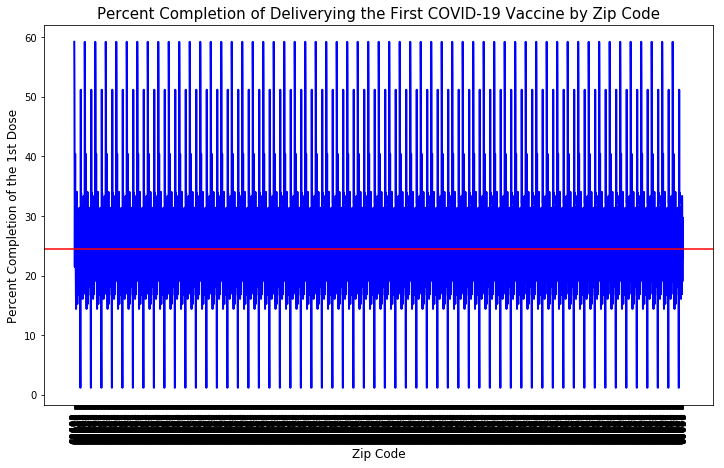

In [38]:
## plot the zip code & the percent of the 1st dose completion 

x_axis_label = final_max_date_df["Zip Code"]
x_axis = final_max_date_df.index
y_axis = final_max_date_df["1st_dose_percent_complete"]

fig1, ax1 = plt.subplots(figsize=(12, 7))
plt.title('Percent Completion of Deliverying the First COVID-19 Vaccine by Zip Code',fontsize =15)
plt.plot(x_axis, y_axis,linewidth=2, markersize=0, marker="o",color="blue")
plt.xlabel('Zip Code',fontsize =12)
plt.ylabel('Percent Completion of the 1st Dose',fontsize =12)
## define the xtick labels
plt.xticks(x_axis, x_axis_label, rotation=90)

## draw the chicago city average %1st dose completion
plt.axhline(y = percent_1st_dose_complete_Chicago, color = 'r', linestyle = '-')

## Note: Comment out the plt.show() will remove the "Figure size description"
plt.show()
plt.tight_layout()


In [21]:
#create heat map of % complete - Sarah 
#save heatmap for presentation


In [ ]:
#median age comparison across zip codes - bar graph - John
#median age comparison to % complete/zip code- if time
#save png for presentation


In [ ]:
#create a scatterplot comparing average income per capita and % vaccination- Amy
#calculate the r-value